<a href="https://colab.research.google.com/github/Devnaam/Bivariate-analysis/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Now here we are going to load the dataset**

In [6]:
# Load the dataset
file_path = '/content/drive/MyDrive/marketing_campaign.csv'
df = pd.read_csv(file_path, sep='\t') # Note: The separator is a tab

In [5]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0  5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1  2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                         

In [7]:
print("Column names of the dataset:")
print(df.columns)

Column names of the dataset:
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [8]:
# Display the first 5 rows to get a feel for the data
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2

In [10]:
# Get a summary of the DataFrame to check data types and missing values
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    

In [11]:
# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000   

**Handling Missing Values**

In [12]:
# Calculate the median income
median_income = df['Income'].median()

# Fill missing 'Income' values with the median
df['Income'].fillna(median_income, inplace=True)

# Verify that there are no more missing values in 'Income'
print("Missing values in 'Income' after imputation:", df['Income'].isnull().sum())

Missing values in 'Income' after imputation: 0


/tmp/ipython-input-2356314132.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(median_income, inplace=True)


In [13]:
current_year = 2024
df['Age'] = current_year - df['Year_Birth']

# Filter out the age outlier
df = df[df['Age'] < 100]

# Let's check the age distribution after filtering
print("\nAge distribution after filtering:")
print(df['Age'].describe())


Age distribution after filtering:
count    2237.000000
mean       55.098346
std        11.701917
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: Age, dtype: float64


In [14]:
spend_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spend'] = df[spend_columns].sum(axis=1)

# Let's see the descriptive stats for our new feature
print("\nDescriptive statistics for Total_Spend:")
print(df['Total_Spend'].describe())


Descriptive statistics for Total_Spend:
count    2237.000000
mean      605.743406
std       601.840466
min         5.000000
25%        69.000000
50%       396.000000
75%      1045.000000
max      2525.000000
Name: Total_Spend, dtype: float64


/tmp/ipython-input-1476803075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Spend'] = df[spend_columns].sum(axis=1)


In [15]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Accepted_Cmp'] = df[campaign_columns].sum(axis=1)

/tmp/ipython-input-741051980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Accepted_Cmp'] = df[campaign_columns].sum(axis=1)


In [16]:
# Marital Status simplification
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Absurd', 'YOLO'], 'Alone')
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partnered')

# Add children and partner to get family size
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + 1 # +1 for the customer themselves
df.loc[df['Marital_Status'] == 'Alone', 'Family_Size'] = df['Kidhome'] + df['Teenhome'] + 1

/tmp/ipython-input-650627529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Absurd', 'YOLO'], 'Alone')
/tmp/ipython-input-650627529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partnered')
/tmp/ipython-input-650627529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

**Data Transformation and Selection**

In [17]:
# Select the final features for clustering
cluster_features = ['Age', 'Income', 'Total_Spend', 'Recency', 'Kidhome', 'Teenhome', 'Total_Accepted_Cmp', 'Family_Size']
df_cluster = df[cluster_features]

# We need to scale our features so that they have equal weight in the clustering algorithm.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

**Finding the Optimal Number of Clusters with the Elbow Method**

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# A list for storing inertia values
inertia = []

# A range of cluster numbers to test, from 1 to 10
k_values = range(1, 11)

# Iterating through the range of k values
for k in k_values:
    # Doing the K-Means clustering with the current k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    # Appending the inertia to the list
    inertia.append(kmeans.inertia_)

 Plotting the Elbow Curve

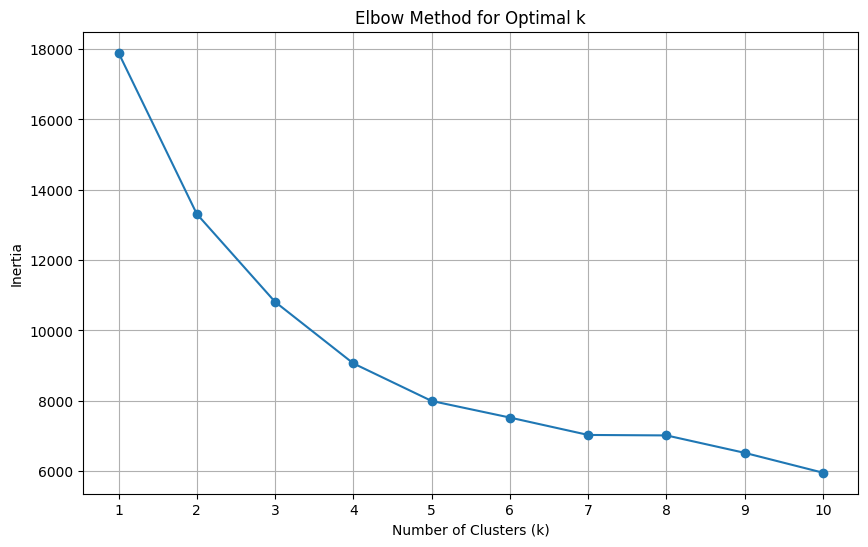

In [20]:
# Doing the plotting of the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')

# Describing the plot title and labels
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**Building the K-Means Model**

In [21]:
# Selecting the optimal number of clusters based on the elbow plot
n_clusters = 4

# Doing the K-Means clustering with the selected number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
# Fitting the model to the scaled data
kmeans.fit(scaled_features)

# Creating a new column in the original DataFrame for the cluster labels
df['Cluster'] = kmeans.labels_

# Describing the distribution of customers across the created clusters
print("Distribution of customers across clusters:")
print(df['Cluster'].value_counts())

Distribution of customers across clusters:
Cluster
3    660
2    616
1    528
0    433
Name: count, dtype: int64


/tmp/ipython-input-2176361797.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


**Analyzing and Describing the Segments**

In [22]:
# Grouping the DataFrame by the cluster labels
cluster_analysis = df.groupby('Cluster').agg(
    # Doing the calculation of the mean income for each cluster
    Avg_Income=('Income', 'mean'),
    # Calculating the mean age
    Avg_Age=('Age', 'mean'),
    # Calculating the mean total spend
    Avg_Total_Spend=('Total_Spend', 'mean'),
    # Calculating the mean recency
    Avg_Recency=('Recency', 'mean'),
    # Calculating the mean family size
    Avg_Family_Size=('Family_Size', 'mean')
).round(2)

print("\nCluster Analysis (Mean values per cluster):")
print(cluster_analysis)



Cluster Analysis (Mean values per cluster):
         Avg_Income  Avg_Age  Avg_Total_Spend  Avg_Recency  Avg_Family_Size
Cluster                                                                    
0          44371.18    58.71           218.92        49.66             3.12
1          77733.28    55.77          1388.41        49.76             1.07
2          31280.08    45.89           149.97        48.65             1.82
3          56527.71    60.79           658.78        48.64             2.01


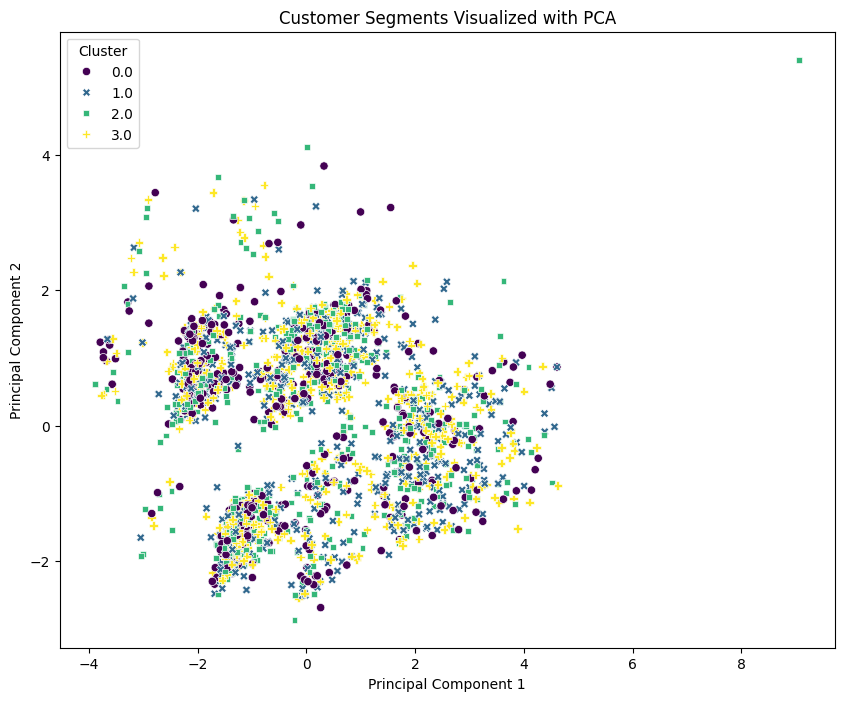

In [23]:
from sklearn.decomposition import PCA

# Doing the dimensionality reduction to 2 components for visualization
pca = PCA(n_components=2)
# Fitting and transforming the scaled features
pca_components = pca.fit_transform(scaled_features)

# Creating a new DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
# Assigning the cluster labels to the PCA DataFrame
pca_df['Cluster'] = df['Cluster']

# Doing the plotting of the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', style='Cluster')
# Describing the plot
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()